In [2]:
from binary_RB import BinaryRB_Experiment
from selene_sim import DepolarizingErrorModel, Stim

In [3]:
# select parameters and build experiment

n_qubits = 98
seq_lengths = [4, 12, 20]
seq_reps = 10
n_meas_per_layer = [0, 8, 16]
filename = 'exp_binary_RB_example.py'

exp = BinaryRB_Experiment(n_qubits, seq_lengths, seq_reps,
                          n_meas_per_layer=n_meas_per_layer,
                         filename=filename)
exp.add_settings()

Having setup our binary RB experiment, we can now either simulate using a local simulator or submit to a hardware or emulator backend.

### Run local simulation using Selene

In [4]:
# setup error model

error_model = DepolarizingErrorModel(
    random_seed=1234,
    # single qubit gate error rate
    #p_1q=3e-5,
    #p_1q=1e-3,
    # two qubit gate error rate
    p_2q=1e-3,
    # set state preparation and measurement error rates to 0
    p_meas=1.5e-3,
    p_init=0,
)

In [5]:
# simulate experiment

shots = 100
simulator = Stim()

exp.sim(shots, error_model=error_model, simulator=simulator)

Simulating ...
1/90 circuits complete
2/90 circuits complete
3/90 circuits complete
4/90 circuits complete
5/90 circuits complete
6/90 circuits complete
7/90 circuits complete
8/90 circuits complete
9/90 circuits complete
10/90 circuits complete
11/90 circuits complete
12/90 circuits complete
13/90 circuits complete
14/90 circuits complete
15/90 circuits complete
16/90 circuits complete
17/90 circuits complete
18/90 circuits complete
19/90 circuits complete
20/90 circuits complete
21/90 circuits complete
22/90 circuits complete
23/90 circuits complete
24/90 circuits complete
25/90 circuits complete
26/90 circuits complete
27/90 circuits complete
28/90 circuits complete
29/90 circuits complete
30/90 circuits complete
31/90 circuits complete
32/90 circuits complete
33/90 circuits complete
34/90 circuits complete
35/90 circuits complete
36/90 circuits complete
37/90 circuits complete
38/90 circuits complete
39/90 circuits complete
40/90 circuits complete
41/90 circuits complete
42/90 circ

### Submit to Quantinuum Hardware or Emulator backend using Nexus

In [ ]:
# Choose domain and login to Nexus

import qnexus
from qnexus.config import CONFIG

CONFIG.domain = "qa.myqos.com"
qnexus.login()

In [ ]:
# choose nexus project and setup quantinuum backend config

project = qnexus.projects.get_or_create(name='binary_RB-example-project')
qnexus.context.set_active_project(project)

backend_config = qnexus.QuantinuumConfig(device_name='Helios-1E', simulator='stabilizer', max_cost=1000000)

In [ ]:
# submit experiment. Returns a qnexus ExecuteJobRef

shots = 100

execute_job_ref = exp.submit(shots, backend_config)

In [ ]:
# inspect status of the execution job

qnexus.jobs.status(execute_job_ref)

In [ ]:
# retrieve results

exp.retrieve(execute_job_ref)

### Analyze experiment results

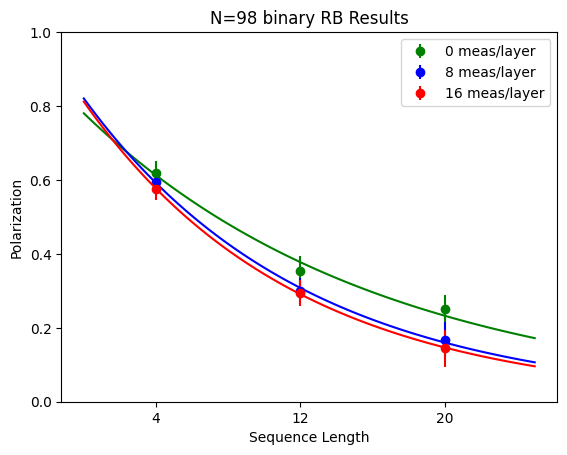

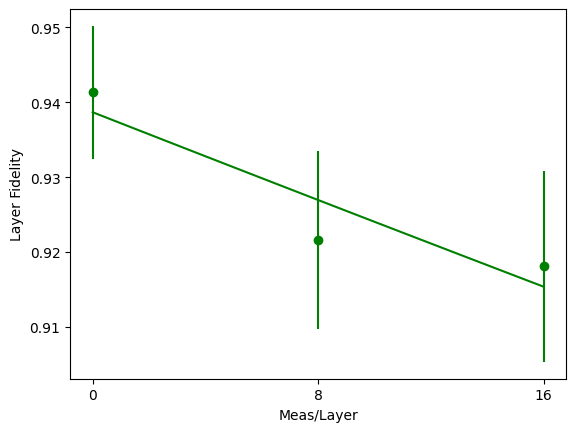

Max depth with success > 2/3
MCMR/layer = 0: 26
MCMR/layer = 8: 20
MCMR/layer = 16: 19
Effective TQ avg fidelity: 0.99901 +/- 0.00015
Effective MCMR error: 0.00105 +/- 0.00074


In [6]:
exp.analyze_results(xlim=(0,25), ylim=(0,1))

In [55]:
# save experiment object to working directory

exp.save()